#Import Library


In [461]:
#Standard Libraries for visualization and data wrangling 
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns; sns.set()
%matplotlib inline
sns.set_style('whitegrid')
#Logistic Regression Models

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

%matplotlib inline




In [462]:
missing_values3 =['?']
df = pd.read_csv('https://raw.githubusercontent.com/buildwelllabs/machine.learning.project/master/diabetic_data.csv',na_values=missing_values3)
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


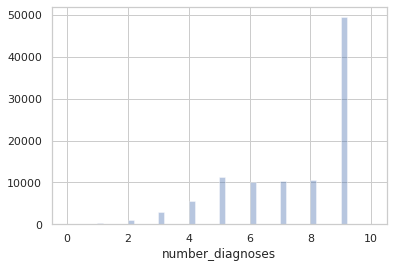

In [463]:
sns.distplot(df['number_diagnoses'], kde=False, hist=True, kde_kws={"clip":(0,40)}, hist_kws={"range":(0,10)})

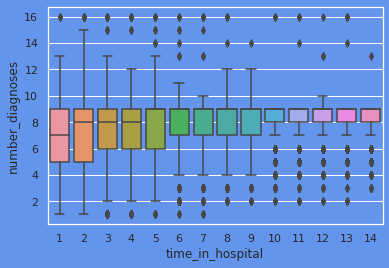

In [464]:
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
sns.boxplot(x='time_in_hospital',y='number_diagnoses',data=df)

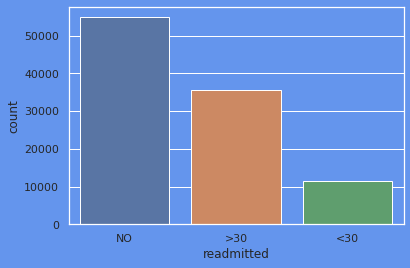

In [465]:
sns.countplot(data=df,x=df['readmitted'])

#Data Cleaning


In [466]:
df.drop(['weight','encounter_id','patient_nbr','medical_specialty','diag_1','diag_2','diag_3','patient_nbr','payer_code','change','admission_type_id','discharge_disposition_id','admission_source_id','number_outpatient','number_emergency',	'number_inpatient','max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','acetohexamide', 'tolbutamide','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','glimepiride','glipizide','glyburide','pioglitazone','rosiglitazone'],axis=1,inplace=True)

In [467]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,insulin,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,1,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,9,Up,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,6,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,7,Up,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,5,Steady,Yes,NO


In [468]:
df['race'].fillna('Other',inplace=True)

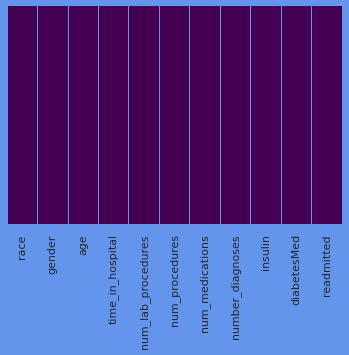

In [469]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [470]:
df.replace({'Caucasian': '1'}, regex=True,inplace=True) 
df.replace({'AfricanAmerican': '2'}, regex=True,inplace=True)
df.replace({'Asian': '3'}, regex=True,inplace=True)
df.replace({'Hispanic': '4'}, regex=True,inplace=True)
df.replace({'Other': '5'}, regex=True,inplace=True)


In [471]:
df['race'].unique()

array(['1', '2', '5', '3', '4'], dtype=object)

In [472]:
sex = pd.get_dummies(df['gender'], drop_first=True)
df = pd.concat([df,sex ],axis=1)
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,insulin,diabetesMed,readmitted,Male,Unknown/Invalid
0,1,Female,[0-10),1,41,0,1,1,No,No,NO,0,0
1,1,Female,[10-20),3,59,0,18,9,Up,Yes,>30,0,0
2,2,Female,[20-30),2,11,5,13,6,No,Yes,NO,0,0
3,1,Male,[30-40),2,44,1,16,7,Up,Yes,NO,1,0
4,1,Male,[40-50),1,51,0,8,5,Steady,Yes,NO,1,0


In [473]:
df.drop('gender',axis=1,inplace=True)

In [474]:
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,insulin,diabetesMed,readmitted,Male,Unknown/Invalid
0,1,[0-10),1,41,0,1,1,No,No,NO,0,0
1,1,[10-20),3,59,0,18,9,Up,Yes,>30,0,0
2,2,[20-30),2,11,5,13,6,No,Yes,NO,0,0
3,1,[30-40),2,44,1,16,7,Up,Yes,NO,1,0
4,1,[40-50),1,51,0,8,5,Steady,Yes,NO,1,0


In [475]:
df.drop('insulin',axis=1,inplace=True)

In [476]:
insulin = pd.get_dummies(df['diabetesMed'], drop_first=True)
df = pd.concat([df,insulin ],axis=1)
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,diabetesMed,readmitted,Male,Unknown/Invalid,Yes
0,1,[0-10),1,41,0,1,1,No,NO,0,0,0
1,1,[10-20),3,59,0,18,9,Yes,>30,0,0,1
2,2,[20-30),2,11,5,13,6,Yes,NO,0,0,1
3,1,[30-40),2,44,1,16,7,Yes,NO,1,0,1
4,1,[40-50),1,51,0,8,5,Yes,NO,1,0,1


In [477]:
df.drop('diabetesMed',axis=1,inplace=True)
df.rename(columns={'Yes':'Diabetes Med'},inplace=True)

In [478]:
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Unknown/Invalid,Diabetes Med
0,1,[0-10),1,41,0,1,1,NO,0,0,0
1,1,[10-20),3,59,0,18,9,>30,0,0,1
2,2,[20-30),2,11,5,13,6,NO,0,0,1
3,1,[30-40),2,44,1,16,7,NO,1,0,1
4,1,[40-50),1,51,0,8,5,NO,1,0,1


In [479]:
df.replace({'NO': '0'}, regex=True,inplace=True) 
df.replace({'<30': '2'}, regex=True,inplace=True)
df.replace({'>30': '2'}, regex=True,inplace=True)
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Unknown/Invalid,Diabetes Med
0,1,[0-10),1,41,0,1,1,0,0,0,0
1,1,[10-20),3,59,0,18,9,2,0,0,1
2,2,[20-30),2,11,5,13,6,0,0,0,1
3,1,[30-40),2,44,1,16,7,0,1,0,1
4,1,[40-50),1,51,0,8,5,0,1,0,1


In [480]:
df['readmitted'].unique()

array(['0', '2'], dtype=object)

In [481]:
df.replace({'\[0-10\)': '0'}, regex=True,inplace=True) 
df.replace({'\[10-20\)': '1'}, regex=True,inplace=True)
df.replace({'\[20-30\)': '2'}, regex=True,inplace=True)
df.replace({'\[30-40\)': '3'}, regex=True,inplace=True)
df.replace({'\[40-50\)': '4'}, regex=True,inplace=True)
df.replace({'\[50-60\)': '5'}, regex=True,inplace=True)
df.replace({'\[60-70\)': '6'}, regex=True,inplace=True)
df.replace({'\[70-80\)': '7'}, regex=True,inplace=True)
df.replace({'\[80-90\)': '8'}, regex=True,inplace=True)
df.replace({'\[90-100\)': '9'}, regex=True,inplace=True)
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Unknown/Invalid,Diabetes Med
0,1,0,1,41,0,1,1,0,0,0,0
1,1,1,3,59,0,18,9,2,0,0,1
2,2,2,2,11,5,13,6,0,0,0,1
3,1,3,2,44,1,16,7,0,1,0,1
4,1,4,1,51,0,8,5,0,1,0,1


In [482]:
df.drop('Unknown/Invalid',axis=1,inplace=True)

In [483]:
df.head()

,race,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,readmitted,Male,Diabetes Med
0,1,0,1,41,0,1,1,0,0,0
1,1,1,3,59,0,18,9,2,0,1
2,2,2,2,11,5,13,6,0,0,1
3,1,3,2,44,1,16,7,0,1,1
4,1,4,1,51,0,8,5,0,1,1


In [484]:
df['age'].astype(str).astype(int)
df['race'].astype(str).astype(int)
df['readmitted'].astype(str).astype(int)

0         0
1         2
2         0
3         0
4         0
         ..
101761    2
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64

In [485]:
df['readmitted'].unique()

array(['0', '2'], dtype=object)

#Logistic Regression

In [486]:
ds = df
y = ds['readmitted']
X = ds[['race','age','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_diagnoses','Male','Diabetes Med']]

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [488]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [489]:
logmodel = LogisticRegression()

In [490]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Predictions and Evaluations

In [491]:
y_pred = logmodel.predict(X_test)

In [492]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.69      0.63     16426
           2       0.53      0.40      0.45     14104

    accuracy                           0.56     30530
   macro avg       0.55      0.54      0.54     30530
weighted avg       0.55      0.56      0.55     30530



[[11340  5086]
 [ 8471  5633]]


#Confusion Matrix

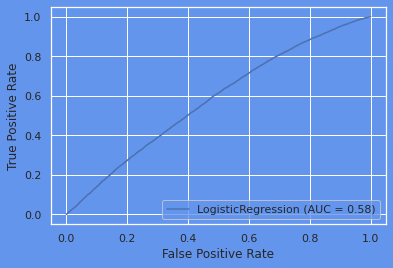

In [497]:
metrics.plot_roc_curve(logmodel, X_test, y_test)  